General Setup

In [1]:
# Load necessary libraries
import matplotlib
matplotlib.use('Agg')
import numpy as np
import pandas as pd
import seaborn as sns
import GPy
import pickle

%pylab inline

def get_ard_params(m):
    return pd.DataFrame(m.kern.input_sensitivity())

def get_lv(m, dat):
    latent_variables = pd.DataFrame({'cell': pd.Series(list(dat.index), index=list(dat.index)), 
    'LV0': pd.Series(m.latent_space[:, 0].mean, index=list(dat.index)), 
    'LV1': pd.Series(m.latent_space[:, 1].mean, index=list(dat.index)), 
    'LV2': pd.Series(m.latent_space[:, 2].mean, index=list(dat.index)),
    'LV3': pd.Series(m.latent_space[:, 3].mean, index=list(dat.index)),
    'LV4': pd.Series(m.latent_space[:, 4].mean, index=list(dat.index)),
    'LV5': pd.Series(m.latent_space[:, 5].mean, index=list(dat.index))})
    
    return latent_variables

def read_dataSS2(path):
    treg_mat = pd.read_csv(path, header = 0, index_col = 0)
    tissue = treg_mat.tissue
    cell_type = treg_mat.cell_type
    del treg_mat['tissue']
    del treg_mat['cell_type']
    treg_mat = treg_mat[[col for col in list(treg_mat) if col.startswith('ENS')]]
    
    return treg_mat, tissue, cell_type

def read_data10X(path):
    treg_mat = pd.read_csv(path, header = 0, index_col = 0)
    tissue = treg_mat.cell_type_sort
    cell_type = treg_mat.cl_annot
    del treg_mat['cell_type_sort']
    del treg_mat['cl_annot']
    treg_mat = treg_mat[[col for col in list(treg_mat) if col.startswith('ENS')]]
    
    return treg_mat, tissue, cell_type

def run_bgplvm(dat, dim = 6):
    np.random.seed(seed=1234)
    bgplvm = GPy.models.BayesianGPLVM(dat.as_matrix(), input_dim=dim)
    bgplvm.optimize(messages=True, max_iters=6000);
    
    return bgplvm

Populating the interactive namespace from numpy and matplotlib


# SS2

### bLN and skin Treg

In [72]:
data_mat, tissue, cell_type = read_dataSS2("./saved_data/SS2/Treg_mouse_skin_LN.csv")

In [73]:
bgplvm_6d = run_bgplvm(data_mat)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s16  0004   2.033311e+05   6.256608e+08 
    00s19  0005   1.933096e+05   9.471959e+07 
    03s23  0115   1.808724e+05   9.415229e+03 
    11s60  0383   1.803371e+05   2.628356e+03 
    36s95  1128   1.802825e+05   9.480228e+01 
Runtime:     36s95
Optimization status: Converged



In [74]:
l_v = get_lv(bgplvm_6d, data_mat)
ard = get_ard_params(bgplvm_6d)

In [75]:
l_v.to_csv("./plots/SS2/BGPLVM/latent_variables_skin_bLN_Treg_hvg.csv")
ard.to_csv("./plots/SS2/BGPLVM/ARD_skin_bLN_Treg_hvg.csv")

 /nfs/team205/tpcg/bin/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning:The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
 /nfs/team205/tpcg/bin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


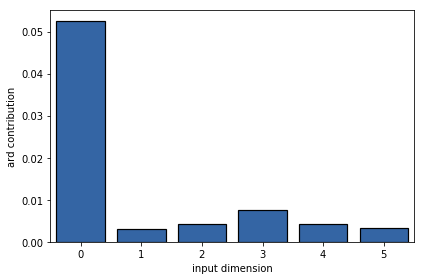

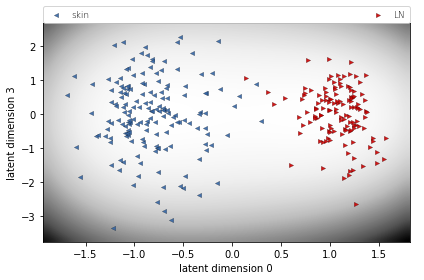

In [76]:
bgplvm_6d.kern.plot_ARD();
bgplvm_6d.plot_latent(labels = tissue, which_indices=[0,3]);

### mLN and colon Treg

In [78]:
data_mat, tissue, cell_type = read_dataSS2("./saved_data/SS2/Treg_mouse_colon_LN.csv")

In [79]:
bgplvm_6d = run_bgplvm(data_mat)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s04  0001   2.255513e+05   8.263525e+08 
    00s19  0005   1.760260e+05   5.627356e+08 
    02s21  0080   1.472790e+05   1.319369e+04 
    08s29  0320   1.469488e+05   1.261174e+03 
    17s65  0735   1.469256e+05   4.118767e+00 
Runtime:     17s65
Optimization status: Converged



In [80]:
l_v = get_lv(bgplvm_6d, data_mat)
ard = get_ard_params(bgplvm_6d)

In [81]:
l_v.to_csv("./plots/SS2/BGPLVM/latent_variables_colon_mLN_Treg_hvg.csv")
ard.to_csv("./plots/SS2/BGPLVM/ARD_colon_mLN_Treg_hvg.csv")

 /nfs/team205/tpcg/bin/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning:The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
 /nfs/team205/tpcg/bin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


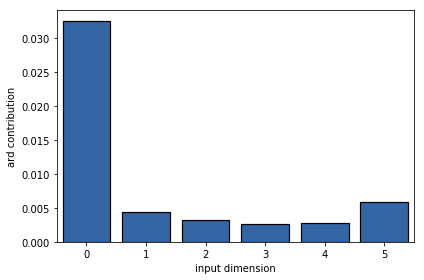

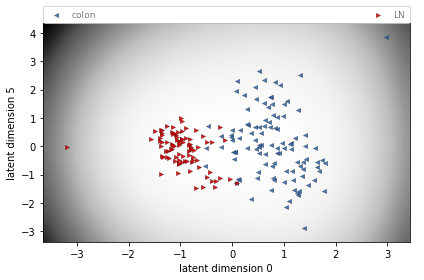

In [82]:
bgplvm_6d.kern.plot_ARD();
bgplvm_6d.plot_latent(labels = tissue, which_indices=[0,5]);

# 10X

### bLN and skin Treg

In [83]:
data_mat, tissue, cell_type = read_data10X("saved_data/10X/Treg_Skin_bLN.csv")

In [84]:
bgplvm_6d = run_bgplvm(data_mat)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    06s83  0008   2.010811e+06   7.981230e+08 
    22s00  0026   1.917396e+06   8.104454e+06 
 01m04s20  0077   1.906641e+06   1.841519e+06 
 03m01s06  0219   1.899613e+06   2.770276e+05 
 08m30s10  0613   1.915010e+06   6.566614e+09 
 23m41s21  1709   1.883368e+06   1.252568e+06 
 31m57s77  2312   1.883085e+06   8.394128e+02 
Runtime:  31m57s77
Optimization status: Converged



In [85]:
l_v = get_lv(bgplvm_6d, data_mat)
ard = get_ard_params(bgplvm_6d)

In [86]:
l_v.to_csv("./plots/10X/BGPLVM/latent_variables_skin_bLN_Treg_hvg.csv")
ard.to_csv("./plots/10X/BGPLVM/ARD_skin_bLN_Treg_hvg.csv")

 /nfs/team205/tpcg/bin/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning:The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0


 /nfs/team205/tpcg/bin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


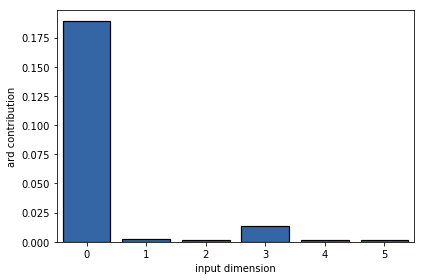

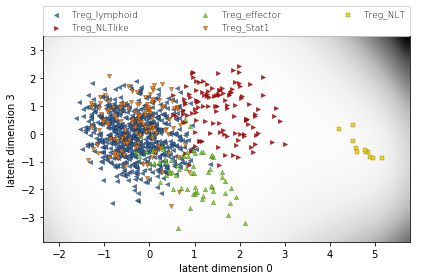

In [87]:
bgplvm_6d.kern.plot_ARD();
bgplvm_6d.plot_latent(labels = cell_type, which_indices=[0,3]);

### mLN and colon Treg

In [18]:
data_mat, tissue, cell_type = read_data10X("saved_data/10X/Treg_Colon_mLN.csv")

In [ ]:
bgplvm_6d = run_bgplvm(data_mat)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    53s83  0007   3.533972e+06   2.466893e+09 
 02m56s99  0023   3.507241e+06   1.288277e+08 
 08m26s18  0066   3.490299e+06   2.623947e+08 
 24m17s23  0186   3.461272e+06   3.070099e+07 
 01h05m04  0519   3.448938e+06   6.876342e+08 
 01h17m13  0619   3.446114e+06   2.747771e+06 

In [24]:
l_v = get_lv(bgplvm_6d, data_mat)
ard = get_ard_params(bgplvm_6d)

In [25]:
l_v.to_csv("./plots/10X/BGPLVM/latent_variables_colon_mLN_Treg_hvg.csv")
ard.to_csv("./plots/10X/BGPLVM/ARD_colon_mLN_Treg_hvg.csv")

 /nfs/team205/tpcg/bin/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning:The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0


 /nfs/team205/tpcg/bin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


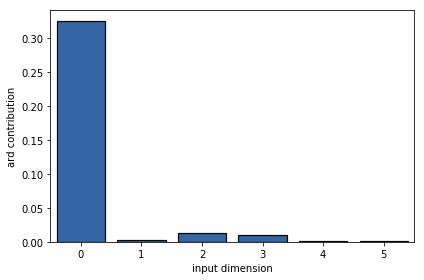

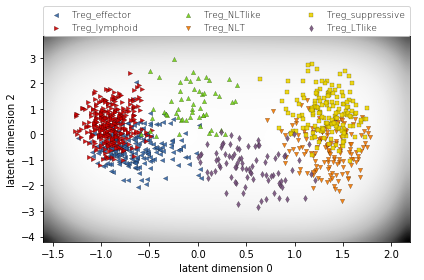

In [26]:
bgplvm_6d.kern.plot_ARD();
bgplvm_6d.plot_latent(labels = cell_type, which_indices=[0,2]);

In [27]:
file_pi = open("./plots/10X/BGPLVM/bgplvm6d_colon_mLN_Treg_hvg.obj", 'wb')
pickle.dump(bgplvm_6d, file_pi)
#filehandler = open("./plots/10X/BGPLVM/bgplvm6d_colon_mLN_Treg_hvg.obj", 'rb')
#obj = pickle.load(filehandler)

### All LN and NLT

In [2]:
data_mat, tissue, cell_type = read_data10X("saved_data/10X/Treg_Colon_Skin_mLN_bLN.csv")

In [ ]:
bgplvm_6d = run_bgplvm(data_mat)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
 01m48s76  0005   5.621680e+06   8.927850e+10 
 05m58s27  0016   5.364876e+06   2.343868e+07 
 17m25s86  0047   5.336566e+06   2.227216e+08 
 46m33s65  0133   5.292425e+06   2.322899e+07 
 02h06m31  0372   5.275751e+06   2.957640e+06 
 05h01m17  0883   5.264226e+06   8.954175e+06 

In [ ]:
l_v = get_lv(bgplvm_6d, data_mat)
ard = get_ard_params(bgplvm_6d)

In [ ]:
l_v.to_csv("./plots/10X/BGPLVM/latent_variables_colon_mLN_skin_bLN_Treg_hvg.csv")
ard.to_csv("./plots/10X/BGPLVM/ARD_colon_mLN_skin_bLN_Treg_hvg.csv")

 /nfs/team205/tpcg/bin/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning:The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0


 /nfs/team205/tpcg/bin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


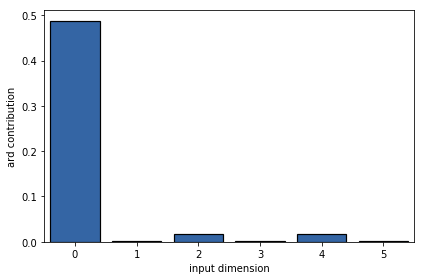

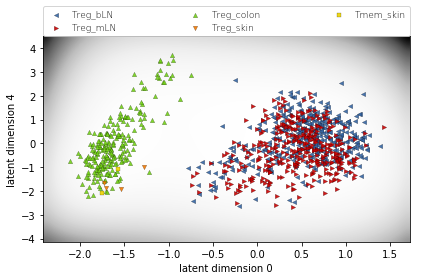

In [17]:
bgplvm_6d.kern.plot_ARD();
bgplvm_6d.plot_latent(labels = tissue, which_indices=[0,4]);

In [14]:
file_pi = open("./plots/10X/BGPLVM/bgplvm6d_colon_mLN_skin_bLN_Treg_hvg.obj", 'wb')
pickle.dump(bgplvm_6d, file_pi)
#filehandler = open("./plots/10X/BGPLVM/bgplvm6d_colon_mLN_skin_bLN_Treg_hvg.obj", 'rb')
#obj = pickle.load(filehandler)

### Predict skin in colon

In [30]:
from GPy.inference.latent_function_inference import inferenceX

In [32]:
filehandler = open("./plots/10X/BGPLVM/bgplvm6d_colon_mLN_Treg_hvg.obj", 'rb')
bgplvm_6d = pickle.load(filehandler)
data_mat, tissue, cell_type = read_data10X("saved_data/10X/Treg_Skin_bLN_colongenes.csv")

In [35]:
a = inferenceX.InferenceX(model = bgplvm_6d, Y = data_mat.as_matrix())

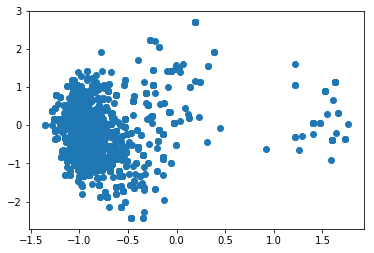

In [37]:
matplotlib.pyplot.scatter(x= a.latent_space[:,0].mean, y =a.latent_space[:,2].mean)

In [42]:
l_v = get_lv(a, data_mat)
l_v.to_csv("./plots/10X/BGPLVM/latent_variables_skin_bLN_colongenes.csv")

### Colon and skin downsampled

In [2]:
data_mat, tissue, cell_type = read_data10X("saved_data/10X/Treg_Colon_mLN_Skin_bLN_ds.csv")

In [3]:
bgplvm_6d = run_bgplvm(data_mat)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    07s48  0008   1.481258e+06   2.181283e+08 
    24s15  0026   1.466078e+06   4.686960e+06 
 01m11s47  0077   1.457328e+06   7.187299e+05 
 03m23s13  0218   1.449618e+06   2.496581e+06 
 10m47s68  0611   1.445069e+06   8.639305e+05 
 32m42s97  1701   1.443401e+06   8.795891e+04 
 34m20s00  1776   1.443397e+06   1.829450e+04 
Runtime:  34m20s00
Optimization status: Converged



In [4]:
l_v = get_lv(bgplvm_6d, data_mat)
ard = get_ard_params(bgplvm_6d)

In [5]:
l_v.to_csv("./plots/10X/BGPLVM/latent_variables_Colon_mLN_Skin_bLN_ds_hvg.csv")
ard.to_csv("./plots/10X/BGPLVM/ARD_Colon_mLN_Skin_bLN_ds_hvg.csv")

 /nfs/team205/tpcg/bin/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning:The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0


 /nfs/team205/tpcg/bin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


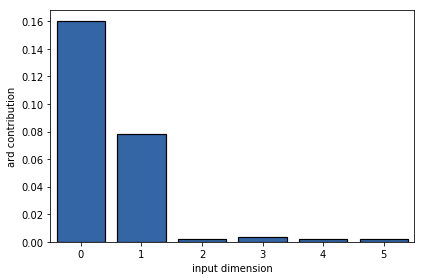

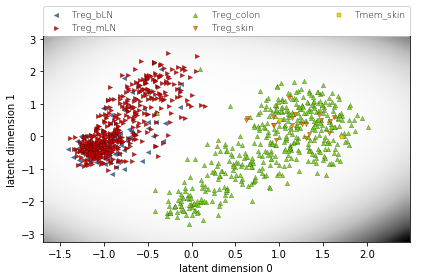

In [10]:
bgplvm_6d.kern.plot_ARD();
bgplvm_6d.plot_latent(labels = tissue, which_indices=[0,1]);

In [7]:
file_pi = open("./plots/10X/BGPLVM/bgplvm6d_Colon_mLN_Skin_bLN_ds_hvg.obj", 'wb')
pickle.dump(bgplvm_6d, file_pi)
#filehandler = open("./plots/10X/BGPLVM/bgplvm6d_colon_mLN_skin_bLN_Treg_hvg.obj", 'rb')
#obj = pickle.load(filehandler)